## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |


In [119]:
import pandas as pd
kommun = pd.Series({0:"Malmö", 1:"Stockholm", 2:"Uppsala", 3:"Göteborg"})
population = pd.Series({0:347949, 1:975551, 2:233839, 3:583056 })
cities_in_sweden = pd.DataFrame({"Kommun": kommun, "Population":population})

cities_in_sweden

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [120]:
import pandas as pd

data = {"Kommun": ["Malmö", "Stockholm", "Uppsala","Göteborg"], "Population": [347949,975551,233839,583056]}
print(data)
cities = pd.DataFrame(data)
cities


{'Kommun': ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'], 'Population': [347949, 975551, 233839, 583056]}


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


&nbsp; a) Use your DataFrame to print out all the cities.

In [121]:
data = {"Kommun": ["Malmö", "Stockholm", "Uppsala","Göteborg"]}
all_cities = pd.DataFrame(data)
all_cities

,Kommun
0,Malmö
1,Stockholm
2,Uppsala
3,Göteborg


&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg.

In [122]:
cities_in_sweden.loc[[3]]

,Kommun,Population
3,Göteborg,583056


In [123]:
cities.loc[cities["Kommun"] == "Göteborg"] # using indexer 

,Kommun,Population
3,Göteborg,583056


In [124]:
select = cities[cities["Kommun"]== "Göteborg"] # Using masking to filter the DataFrame
select

,Kommun,Population
3,Göteborg,583056


&nbsp; c) Sort the cities by population from largest to smallest. 

In [125]:
sorted_cities = cities.sort_values(by = "Population", ascending= False)
sorted_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


&nbsp; d) Filter out the three largest cities.

In [126]:
three_largest_cities = cities[cities["Population"]>=300000].sort_values(by = "Population", ascending= False).reset_index()
three_largest_cities

,index,Kommun,Population
0,1,Stockholm,975551
1,3,Göteborg,583056
2,0,Malmö,347949


&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 

In [127]:
total_sweden_population = 10379295
percentage_population =  100 * (sorted_cities["Population"]/ total_sweden_population)
sorted_cities["Population(%)"] = round(percentage_population, 1)
sorted_cities

,Kommun,Population,Population(%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


## 2. Cities in Sweden - real dataset 

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 


&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. 

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt",skiprows = 5).iloc[1:]
df.head()

,Rang,Unnamed: 1,Kommun,Folkmängd 31 december,Unnamed: 4,Förändring
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276
5,169,167,Arboga,14039,14087,-0.34074


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 1 to 290
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rang                   290 non-null    int64 
 1   Unnamed: 1             290 non-null    int64 
 2   Kommun                 290 non-null    object
 3   Folkmängd 31 december  290 non-null    int64 
 4   Unnamed: 4             290 non-null    int64 
 5   Förändring             290 non-null    object
dtypes: int64(4), object(2)
memory usage: 13.7+ KB


In [130]:
df.describe()

,Rang,Unnamed: 1,Folkmängd 31 december,Unnamed: 4
count,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862
std,83.860002,83.856743,74627.031657,74292.525065
min,1.000000,1.000000,2387.000000,2408.000000
25%,73.250000,73.250000,10014.500000,10075.000000
50%,145.500000,145.500000,16079.500000,15978.000000
75%,217.750000,217.750000,36215.250000,36096.750000
max,290.000000,290.000000,975551.000000,974073.000000


In [131]:
df.shape

(290, 6)

In [132]:
df["Kommun"].unique()

array(['Ale', 'Alingsås', 'Alvesta', 'Aneby', 'Arboga', 'Arjeplog',
       'Arvidsjaur', 'Arvika', 'Askersund', 'Avesta', 'Bengtsfors',
       'Berg', 'Bjurholm', 'Bjuv', 'Boden', 'Bollebygd', 'Bollnäs',
       'Borgholm', 'Borlänge', 'Borås', 'Botkyrka', 'Boxholm', 'Bromölla',
       'Bräcke', 'Burlöv', 'Båstad', 'Dals-Ed', 'Danderyd', 'Degerfors',
       'Dorotea', 'Eda', 'Ekerö', 'Eksjö', 'Emmaboda', 'Enköping',
       'Eskilstuna', 'Eslöv', 'Essunga', 'Fagersta', 'Falkenberg',
       'Falköping', 'Falun', 'Filipstad', 'Finspång', 'Flen', 'Forshaga',
       'Färgelanda', 'Gagnef', 'Gislaved', 'Gnesta', 'Gnosjö', 'Gotland',
       'Grums', 'Grästorp', 'Gullspång', 'Gällivare', 'Gävle', 'Göteborg',
       'Götene', 'Habo', 'Hagfors', 'Hallsberg', 'Hallstahammar',
       'Halmstad', 'Hammarö', 'Haninge', 'Haparanda', 'Heby', 'Hedemora',
       'Helsingborg', 'Herrljunga', 'Hjo', 'Hofors', 'Huddinge',
       'Hudiksvall', 'Hultsfred', 'Hylte', 'Håbo', 'Hällefors',
       'Härjedalen', '

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |


In [133]:
df.rename(
    columns={
        "Rang": "Range 2020",
        "Unnamed: 1": "Range 2019",
        "Folkmängd 31 december": "Folkmängd 2020",
        "Unnamed: 4": "Folkmängd 2019",
    },
    inplace=True,
)
df.head()


,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276
5,169,167,Arboga,14039,14087,-0.34074


&nbsp; c) Sort the cities by population from largest to smallest. (*)

In [134]:
sort_largest_cities = df.sort_values(by="Folkmängd 2020", ascending= False).head()
sort_largest_cities

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
199,1,1,Stockholm,975551,974073,0.151734
58,2,2,Göteborg,583056,579281,0.65167
135,3,3,Malmö,347949,344166,1.099179
242,4,4,Uppsala,233839,230767,1.331213
125,5,5,Linköping,164616,163051,0.959822


&nbsp; d) Filter out the five smallest cities.


In [135]:
smallest_cities = df.sort_values(by="Folkmängd 2020", ascending= True).head()
smallest_cities


,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
13,290,290,Bjurholm,2387,2408,-0.872093
195,289,289,Sorsele,2442,2489,-1.888309
30,288,288,Dorotea,2498,2551,-2.077617
6,287,287,Arjeplog,2718,2785,-2.405745
272,286,286,Åsele,2805,2794,0.393701


In [136]:
sort_smallest_cities = smallest_cities.iloc[::-1]
sort_smallest_cities

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
272,286,286,Åsele,2805,2794,0.393701
6,287,287,Arjeplog,2718,2785,-2.405745
30,288,288,Dorotea,2498,2551,-2.077617
195,289,289,Sorsele,2442,2489,-1.888309
13,290,290,Bjurholm,2387,2408,-0.872093


&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. 


In [137]:
df.head()

,Range 2020,Range 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276
5,169,167,Arboga,14039,14087,-0.34074


In [138]:
sweden_population_2020 = df["Folkmängd 2020"].sum()
sweden_population_2019 = df["Folkmängd 2019"].sum()
print(f"Populationen i Sverige 2020 :{sweden_population_2020}")
print(f"Populationen i Sverige 2019 :{sweden_population_2019}")


Populationen i Sverige 2020 :10379295
Populationen i Sverige 2019 :10327589


&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities.  

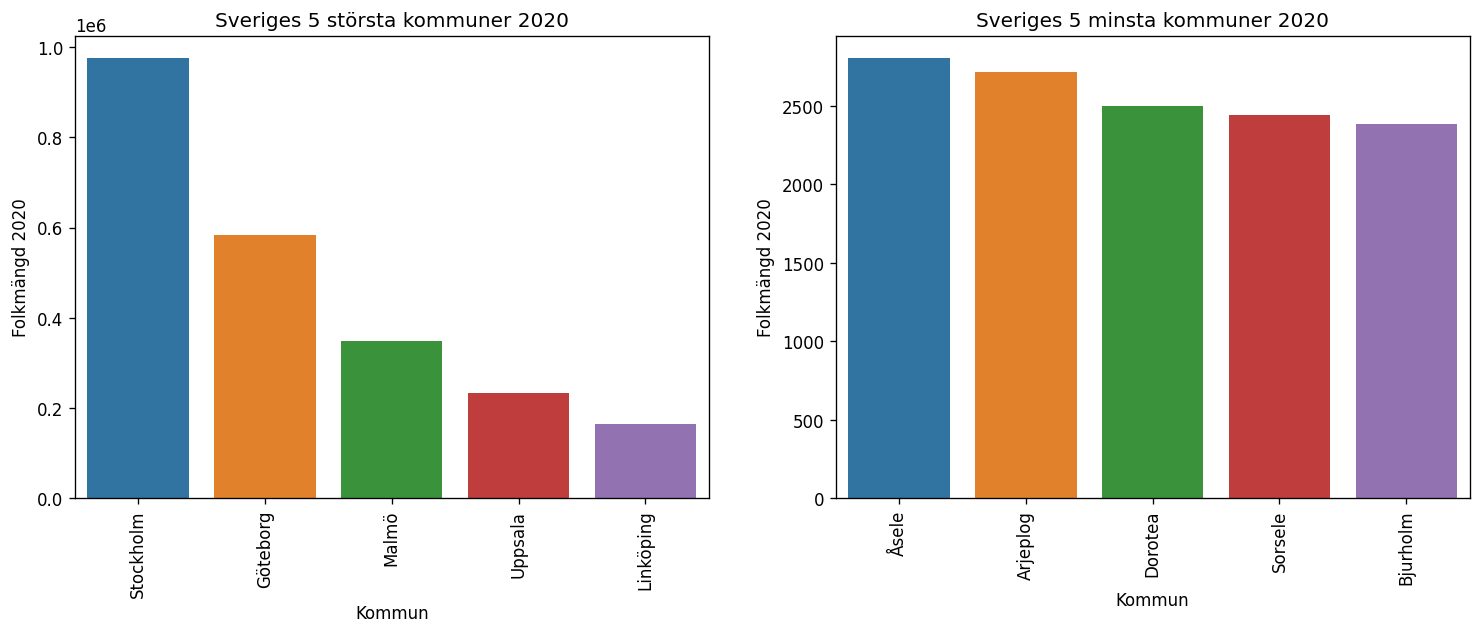

In [139]:
fig, axes = plt.subplots(1,2, figsize = (15,5), dpi = 120)
titles = ["Sveriges 5 största kommuner 2020", "Sveriges 5 minsta kommuner 2020"]
data_frame = (sort_largest_cities, sort_smallest_cities)
x_columns = ["Kommun", "Kommun"]

for i, (data, title) in enumerate(zip(data_frame, titles)):
    sns.barplot(data=data, x = x_columns[i], y = "Folkmängd 2020", ax= axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
#plt.show()